In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
import seaborn as sns

data = pd.read_excel("TF_BIRTHS.xlsx")

# -----------------------------------------------------------------------------
# Suggestion

# Pour limiter les risques d'erreur sur les types de date et caster sans ambiguité les colonnes de date,
# Ca peut valoir le coup d'utiliser systématiquement le parametre parse_dates dans les fonctions pd.read_excel / pd.read_csv,
# Mais il n'est pas nécéssaire ici car le champ est directement casté ce qui n'est pas toujours le cas suivant le fichier d'input

# -----------------------------------------------------------------------------


data.head(-10)  # equivalent à: data, pour voir les 10 derniers rows faire data.tail(10) 

# -----------------------------------------------------------------------------
# Suggestion

# Pour verifier birevement qu'il n'y ait pas d'anomalie sur les data importées et récupérer des stats de base,
# ça peut valoir le coup de faire un data.describe() et data.info() pour avoir des infos supplémentaires sur le dataframe

# -----------------------------------------------------------------------------


/tmp/ipykernel_4909/2113604381.py:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d
/home/pdesj/work/env/python/v/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,DT_DATE,MS_NUM_BIRTHS
0,1992-01-01,219
1,1992-01-02,331
2,1992-01-03,420
3,1992-01-04,282
4,1992-01-05,252
...,...,...
10943,2021-12-17,374
10944,2021-12-18,213
10945,2021-12-19,211
10946,2021-12-20,386


/tmp/ipykernel_4909/3836133689.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['smooth'] = sub_data_smoothed


<AxesSubplot: xlabel='DT_DATE', ylabel='MS_NUM_BIRTHS'>

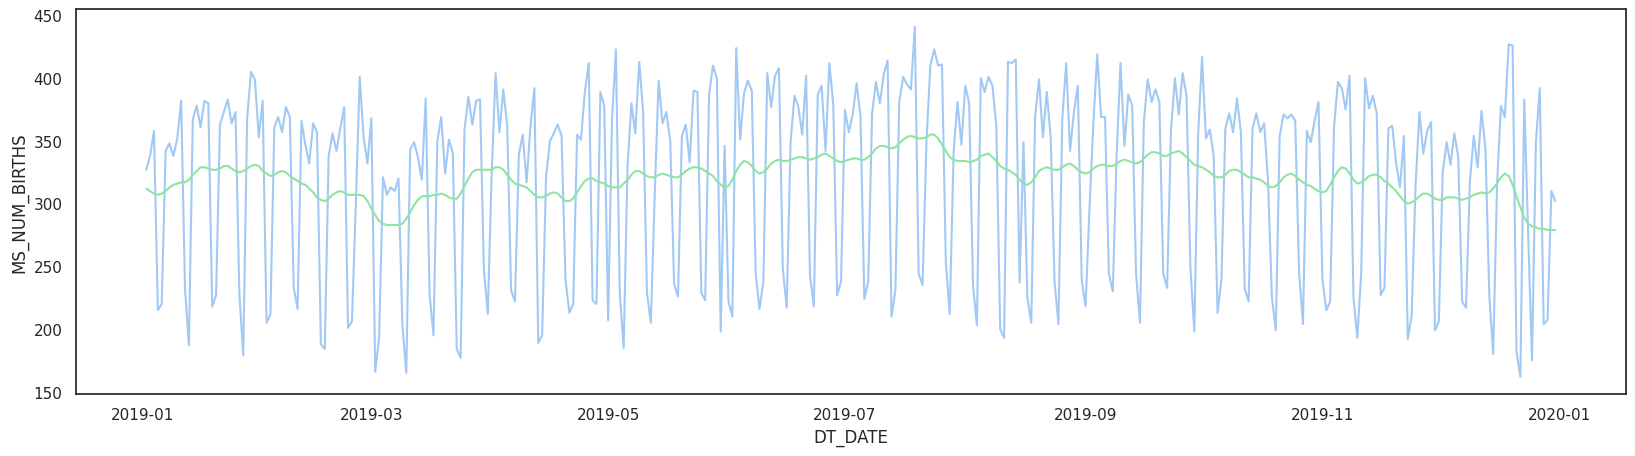

In [2]:
# print raw and smoothed data for 2019
annee = 2019

sub_data = data.loc[(data['DT_DATE']>str(annee)+'-01-01') & (data['DT_DATE']<str(annee+1)+'-01-01'), :]

# -----------------------------------------------------------------------------
# Suggestion

# On peut le faire plus rapidement avec les fonctions de date de pandas:
# sub_data = data[data.DT_DATE.dt.year == annee].copy()

# -----------------------------------------------------------------------------




# # compute smoothing using gaussian filter 1d de Scipy
sigma = 3
sub_data_smoothed = gaussian_filter1d(np.array(sub_data['MS_NUM_BIRTHS']), sigma=sigma)
sub_data['smooth'] = sub_data_smoothed


# -----------------------------------------------------------------------------
# Suggestion

# Possibilité de calculer une moyenne glissante directement avec pandas:
# sub_data.MS_NUM_BIRTHS.rolling(7).mean()  # par semaine
# sub_data.MS_NUM_BIRTHS.rolling(28).mean()  # par mois

# -----------------------------------------------------------------------------


plt.figure(figsize=(20,5))

sns.set_theme(style='white', palette='pastel')
sns.lineplot(data=sub_data, x='DT_DATE', y='MS_NUM_BIRTHS')
sns.lineplot(data=sub_data, x='DT_DATE', y='smooth', color='g')



In [3]:
# -----------------------------------------------------------------------------
# Suggestion

# Mettre en evidence la saisonalité sur les données en regardant la répartition du nb de naaissance

# sns.histplot(data=data, x="MS_NUM_BIRTHS", kde=True)  # on voit la somme de deux gaussiennes ce qui suggère qu'on a une distinction sous-jacente entre 2 groupes
# plt.show()


# On voit avec les lignes suivantes qu'il y a effectivement une saisonnalité à la semaine
# La petite bosse autours autour des 220 naissances pour les jours de lundi au vendredi correspond peut être aux jours feries
# La différence de nb de naissance par jour est probablement dûe aux naissances provoquées 
# On pourrait par exemple verifier que le ratio de naissances entre jour de semaine vs weekend correspond bien au % de naissances provoquées

# tmp = data.copy()
# tmp["day_of_week"] = tmp.DT_DATE.dt.dayofweek
# sns.histplot(data=tmp, x="MS_NUM_BIRTHS", hue="day_of_week", kde=True)
# plt.show()


# -----------------------------------------------------------------------------

# tmp = data.copy()

2016 est bisextile
2020 est bisextile


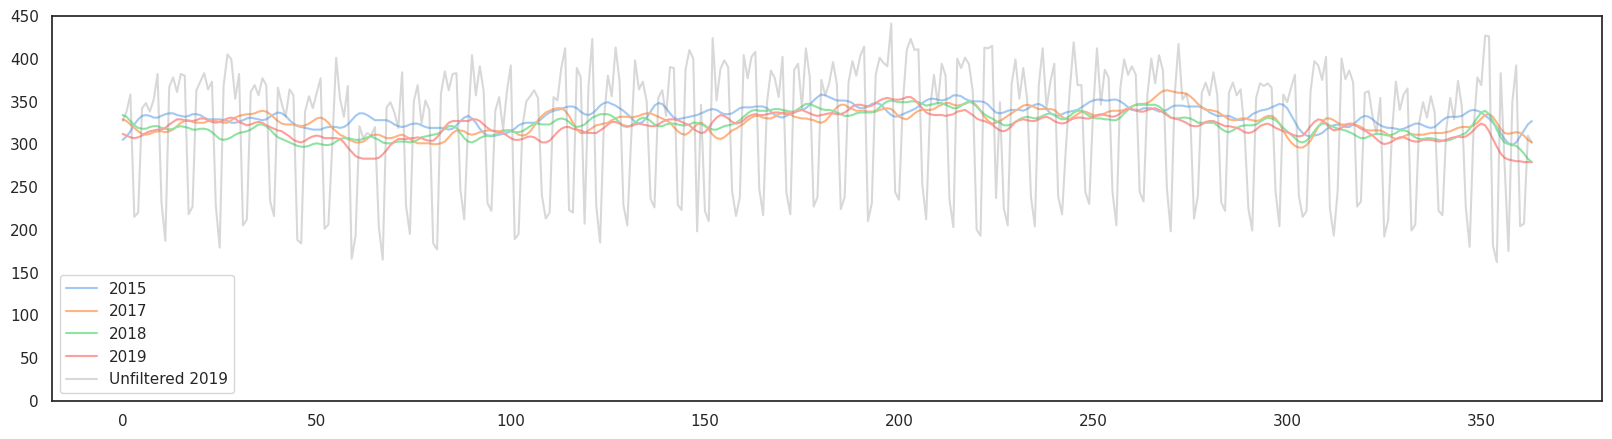

In [4]:
# superpose several years to see tendancy (gaussian filtered)

plt.figure(figsize=(20, 5))
sns.set_theme(style="white", palette="pastel")

# year loop
year_data = pd.DataFrame()

for year in range(2015, 2021):
    data_tmp = data.loc[
        (data["DT_DATE"] > str(year) + "-01-01")
        & (data["DT_DATE"] < str(year + 1) + "-01-01"),
        :,
    ]

    # compute smoothing using gaussian filter 1d de Scipy
    sigma = 3
    year_data_smoothed = gaussian_filter1d(
        np.array(data_tmp["MS_NUM_BIRTHS"]), sigma=sigma
    )

    if len(year_data_smoothed) == 364:
        year_data[str(year)] = year_data_smoothed
        plt.plot(range(364), year_data[str(year)], label=year)
    else:
        print(f"{year} est bisextile")

# add 2019 on plot (without filter)
data_2019 = data.loc[
    (data["DT_DATE"] > "2019-01-01") & (data["DT_DATE"] < "2020-01-01"), :
]

# -----------------------------------------------------------------------------
# Suggestion

# On peut le faire plus rapidement avec les fonctions de date de pandas:
# data_2019 = data[data["DT_DATE"].dt.year == 2019]
# ou
# data_2019 = data[data["DT_DATE"].between("2019-01-01", "2020-01-01")]

# -----------------------------------------------------------------------------



plt.plot(
    range(364),
    data_2019["MS_NUM_BIRTHS"],
    color="grey",
    alpha=0.3,
    label="Unfiltered 2019",
)

plt.ylim((0, 450))
plt.legend()
plt.show()

In [5]:
# -----------------------------------------------------------------------------
# Suggestion

# Sur la cellule precedente:
# Même si les années sont bisextyles on devrait être en mesure de les plotter en modifiant le preprocessing.
# une possibilité pourrait être de merger les df à partir dune colonne de date
# Tu peux retrouver un exemple de création du dataframe ci dessous en utilisant plotly plutôt que matplotlib

# -----------------------------------------------------------------------------

"""
import plotly.express as px


ROLLING_PERIOD = 7

df_per_year = pd.DataFrame(
    {"date": pd.date_range("2019-01-01", "2019-12-31").strftime("%d/%m")}
)


for year in data.DT_DATE.dt.year.unique():
    tmp = data[data.DT_DATE.dt.year == year].copy()
    tmp["date"] = tmp["DT_DATE"].dt.strftime("%d/%m")
    tmp = (
        tmp.set_index("date")
        .MS_NUM_BIRTHS.rolling(ROLLING_PERIOD)
        .mean()
        .round(1)
        .rename(year)
        .reset_index()
    )

    df_per_year = df_per_year.merge(tmp, on="date")


df_per_year["day_of_year"] = np.arange(len(df_per_year))

df_per_year = (
    df_per_year.set_index(["date", "day_of_year"])
    .stack()
    .reset_index()
    .rename(columns={"level_2": "year", 0: "nb_birth_roll"})
)

px.line(
    df_per_year,
    x="day_of_year",
    y="nb_birth_roll",
    color="year",
    range_y=[0, df_per_year.nb_birth_roll.max()],
    hover_data=df_per_year.columns,
)
"""

''

''

        Date  Moon
0 2019-01-06   0.0
1 2019-01-14   0.5
2 2019-01-21   1.0
3 2019-01-27   0.5
4 2019-02-04   0.0


<AxesSubplot: xlabel='Date', ylabel='Moon'>

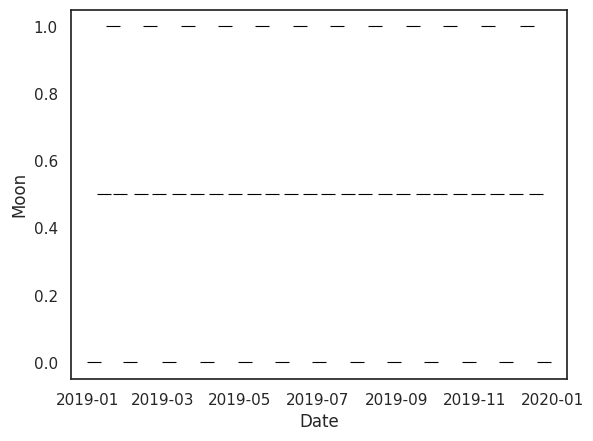

In [6]:
# moon calendar 2019

moon_2019 = pd.DataFrame(
    {
        "Date": ["2019-01-06", "2019-01-14", "2019-01-21", "2019-01-27", "2019-02-04", "2019-02-12", "2019-02-19", "2019-02-26", "2019-03-06", "2019-03-14", "2019-03-21", "2019-03-28", "2019-04-05", "2019-04-12", "2019-04-19", "2019-04-27", "2019-05-05", "2019-05-12", "2019-05-18", "2019-05-26", "2019-06-03", "2019-06-10", "2019-06-17", "2019-06-25", "2019-07-02", "2019-07-09", "2019-07-16", "2019-07-25", "2019-08-01", "2019-08-07", "2019-08-15", "2019-08-23", "2019-08-30", "2019-09-06", "2019-09-14", "2019-09-22", "2019-09-28", "2019-10-05", "2019-10-13", "2019-10-21", "2019-10-28", "2019-11-04", "2019-11-12", "2019-11-19", "2019-11-26", "2019-12-04", "2019-12-12", "2019-12-19", "2019-12-26",],
        "Moon": [0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0,],
    }
)

# -----------------------------------------------------------------------------
# Suggestion

# Le fait de metre beaucup de données numériques ocmme ça peut diminuer la lisibilité du notebook:
# ça peut valoir le coup de les mettre plutot dans un fichier csv et de les importer sous forme de dataframe 

# -----------------------------------------------------------------------------


moon_2019["Date"] = pd.to_datetime(moon_2019["Date"])

# ponderer par les valeur de naissance
# moon_2019.loc[moon_2019['Moon']==1, 'Moon'] = max(sub_data['MS_NUM_BIRTHS']) - 50
# moon_2019.loc[moon_2019['Moon']==0, 'Moon'] = min(sub_data['MS_NUM_BIRTHS']) + 50
# moon_2019.loc[moon_2019['Moon']==0.5, 'Moon'] = min(sub_data['MS_NUM_BIRTHS']) + (max(sub_data['MS_NUM_BIRTHS']) - min(sub_data['MS_NUM_BIRTHS'])) / 2

print(moon_2019.head())

sns.set_style("white")
sns.scatterplot(data=moon_2019, x="Date", y="Moon", color="black", marker="_", s=100)

(142.0, 461.0)

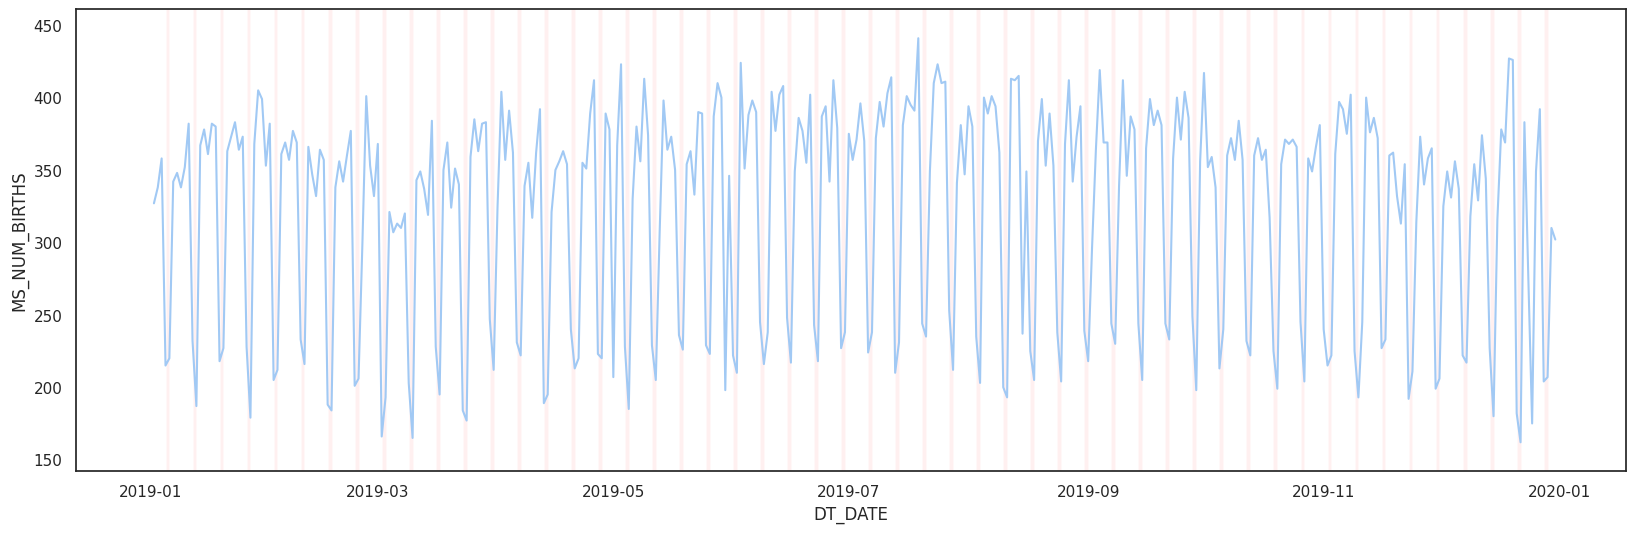

In [7]:
# Validate that drops correspond to week-ends

import calendar

obj = calendar.Calendar()
list_daysWeeks = obj.yeardayscalendar(annee)

# get every sunday of 2019
sundays = []
for t, trimestre in enumerate(list_daysWeeks):
    for m, month in enumerate(trimestre):
        for week in month:
            for d, day in enumerate(week): 

                if day != 0:
                    if d==6:
                        sundays.append([str(annee)+'-'+str(3*t+m+1) +'-' + str(day), True])
                    else:
                        sundays.append([str(annee)+'-'+str(3*t+m+1) +'-' + str(day), False])

# create dataframe of sundays
array_sundays = np.array(sundays)

DF_sundays = pd.DataFrame()
DF_sundays['Date'] = pd.Series(array_sundays[:,0])
DF_sundays['Date'] = pd.to_datetime(DF_sundays['Date'])
DF_sundays['Sunday'] = pd.Series(array_sundays[:,1])

# Give sundays a value to plot on same graph
DF_sundays['Value'] = pd.Series(np.zeros(len(array_sundays)))
DF_sundays.loc[DF_sundays['Sunday']=='True', 'Value'] = 1000
DF_sundays.loc[DF_sundays['Sunday']=='False', 'Value'] = 0

# -----------------------------------------------------------------------------
# Suggestion

# On peut utiliser les fonctions de dates de pandas
# df_sunday = pd.DataFrame({"date": pd.date_range("2019-01-01", "2019-12-31")})
# df_sunday["is_sunday"] = df_sunday.date.dt.dayofweek == 6
# df_sunday["value"] = df_sunday.is_sunday.map({True: 1000, False: 0})  # il y a d'autres manieres de faire mais je montre celle ci pour introduire la fonction map
# -----------------------------------------------------------------------------

DF_sundays.head(14)

plt.figure(figsize=(20,6))

sns.set_theme(style='white', palette='pastel')
sns.lineplot(data=sub_data, x='DT_DATE', y='MS_NUM_BIRTHS')

# plot color bar when the date is sunday
plt.bar(x=DF_sundays['Date'], height=DF_sundays['Value'], color='r', alpha=0.15, width=-1, align='edge')
plt.ylim(min(sub_data['MS_NUM_BIRTHS'])-20, max(sub_data['MS_NUM_BIRTHS'])+20)


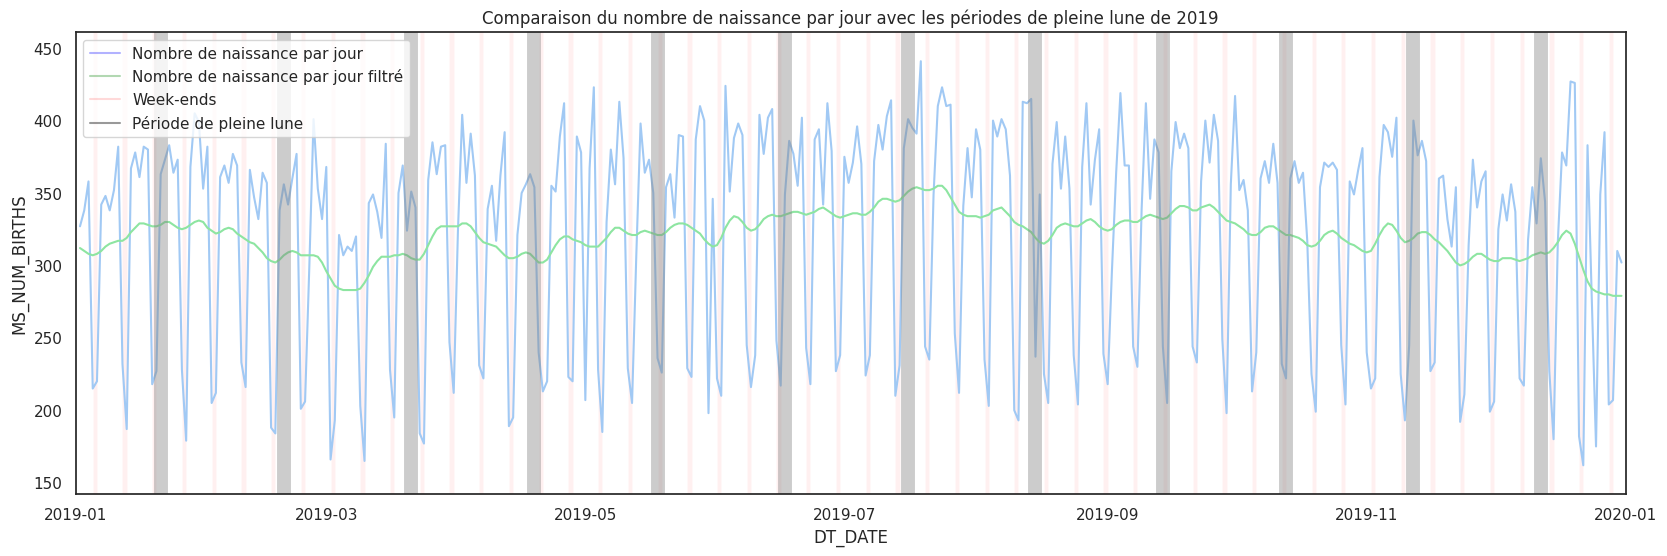

In [8]:
# final plot : 2019 filtered and unfiltered, sundays, full moons

plt.figure(figsize=(20,6))

sns.set_theme(style='white', palette='pastel')
sns.lineplot(data=sub_data, x='DT_DATE', y='MS_NUM_BIRTHS')
sns.lineplot(data=sub_data, x='DT_DATE', y='smooth', color='g')

# plot color bar when the date is sunday
plt.bar(x=DF_sundays['Date'], height=DF_sundays['Value'], color='r', alpha=0.15, width=-1, align='edge')

# plot periods of full moon
for i in range(len(moon_2019)):
    line = moon_2019.iloc[i]
    date = line['Date']
    type = line['Moon']
    if type == 1:
        plt.axvline(date, color='grey', linewidth=10, alpha=0.4)


plt.ylim(min(sub_data['MS_NUM_BIRTHS'])-20, max(sub_data['MS_NUM_BIRTHS'])+20)
plt.xlim(pd.to_datetime('2019-01-01'), pd.to_datetime('2020-01-01'))

plt.title('Comparaison du nombre de naissance par jour avec les périodes de pleine lune de 2019')

# plot legend 
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='blue', alpha = 0.3, markersize=15, label="Nombre de naissance par jour"), 
                    mlines.Line2D([], [], color='green', alpha = 0.3, markersize=15, label="Nombre de naissance par jour filtré"),
                    mlines.Line2D([], [], color='red', alpha = 0.15, markersize=15, label="Week-ends"),
                    mlines.Line2D([], [], color='black', alpha=0.4, markersize=15, label="Période de pleine lune")])
